In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
import zipfile

In [ ]:
!pip install tflite

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 87 kB 3.9 MB/s 


In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"akbarharahap","key":"b900dc6370d2116bcd24069f2ad31a8a"}'}

In [ ]:
!ls -lha kaggle.json

-rw-r--r-- 1 root root 68 Jun 10 07:16 kaggle.json


In [ ]:
!pip install -q kaggle

In [ ]:
# The Kaggle API client expects this file to be in ~/.kaggle,
# so move it there.
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

# This permissions change avoids a warning on Kaggle tool startup.
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
# !kaggle datasets download -d mylearnkaggle/flower-dataset
!kaggle datasets download -d akbarharahap/flowerdataset

 92% 133M/144M [00:02<00:00, 67.7MB/s]
100% 144M/144M [00:02<00:00, 53.9MB/s]


In [ ]:
#local_zip = '/tmp/flower-dataset.zip'
local_zip = '/content/flowerdataset.zip'
zip_ref   = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

In [ ]:
import os

In [ ]:
source_path = '/tmp/images'

source_path_daisy = os.path.join(source_path, 'daisy')
source_path_bougenvile = os.path.join(source_path, 'bougenvile')
source_path_rose = os.path.join(source_path, 'rose')
source_path_sunflower = os.path.join(source_path, 'sunflower')
source_path_tulip = os.path.join(source_path, 'tulip')

# os.listdir returns a list containing all files under the given path
print(f"There are {len(os.listdir(source_path_daisy))} images of daisy.")
print(f"There are {len(os.listdir(source_path_bougenvile))} images of bougenvile.")
print(f"There are {len(os.listdir(source_path_rose))} images of rose.")
print(f"There are {len(os.listdir(source_path_sunflower))} images of sunflower.")
print(f"There are {len(os.listdir(source_path_tulip))} images of tulip.")

There are 675 images of daisy.
There are 65 images of bougenvile.
There are 630 images of rose.
There are 461 images of sunflower.
There are 625 images of tulip.


In [ ]:
import shutil
import random
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from shutil import copyfile

In [ ]:
root_dir = '/tmp/flowers'

# Empty directory to prevent FileExistsError is the function is run several times
if os.path.exists(root_dir):
  shutil.rmtree(root_dir)

# Make directories for training
def create_train_test_dirs(root_path):
  try:
    os.mkdir('/tmp/flowers')
    os.mkdir('/tmp/flowers/training')
    os.mkdir('/tmp/flowers/testing')
    os.mkdir('/tmp/flowers/training/daisy')
    os.mkdir('/tmp/flowers/training/bougenvile')
    os.mkdir('/tmp/flowers/training/rose')
    os.mkdir('/tmp/flowers/training/sunflower')
    os.mkdir('/tmp/flowers/training/tulip')
    os.mkdir('/tmp/flowers/testing/daisy')
    os.mkdir('/tmp/flowers/testing/bougenvile')
    os.mkdir('/tmp/flowers/testing/rose')
    os.mkdir('/tmp/flowers/testing/sunflower')
    os.mkdir('/tmp/flowers/testing/tulip')
  except OSError:
    pass

try:
  create_train_test_dirs(root_path=root_dir)
except FileExistsError:
  print("You should not be seeing this since the upper directory is removed beforehand")

In [ ]:
# Test create_train_test_dirs function

for rootdir, dirs, files in os.walk(root_dir):
    for subdir in dirs:
        print(os.path.join(rootdir, subdir))

/tmp/flowers/training
/tmp/flowers/testing
/tmp/flowers/training/bougenvile
/tmp/flowers/training/daisy
/tmp/flowers/training/rose
/tmp/flowers/training/sunflower
/tmp/flowers/training/tulip
/tmp/flowers/testing/bougenvile
/tmp/flowers/testing/daisy
/tmp/flowers/testing/rose
/tmp/flowers/testing/sunflower
/tmp/flowers/testing/tulip


In [ ]:
# Split data to train and test
def split_data(SOURCE, TRAINING, TESTING, SPLIT_SIZE):
  files=[]
  for filename in os.listdir(SOURCE):
    file = SOURCE + filename
    if os.path.getsize(file) > 0:
      files.append(filename)
    else:
      print('{} is zero length, so ignoring.'.format(filename))

    training_length = int(len(files) * SPLIT_SIZE)
    testing_length = int(len(files) - training_length)
    shuffled_set = random.sample(files, len(files))
    training_set = shuffled_set[0:training_length]
    testing_set = shuffled_set[-testing_length:]
  
  for filename in training_set:
    src_file = SOURCE + filename
    dest_file = TRAINING + filename
    copyfile(src_file, dest_file)
    
  for filename in testing_set:
    src_file = SOURCE + filename
    dest_file = TESTING + filename
    copyfile(src_file, dest_file)

In [ ]:
DAISY_SOURCE_DIR = "/tmp/images/daisy/"
BOUGENVILE_SOURCE_DIR = "/tmp/images/bougenvile/"
ROSE_SOURCE_DIR = "/tmp/images/rose/"
SUNFLOWER_SOURCE_DIR = "/tmp/images/sunflower/"
TULIP_SOURCE_DIR = "/tmp/images/tulip/"

TRAINING_DIR = "/tmp/flowers/training/"
TESTING_DIR = "/tmp/flowers/testing/"

TRAINING_DAISY_DIR = os.path.join(TRAINING_DIR, "daisy/")
TESTING_DAISY_DIR = os.path.join(TESTING_DIR, "daisy/")

TRAINING_BOUGENVILE_DIR = os.path.join(TRAINING_DIR, "bougenvile/")
TESTING_BOUGENVILE_DIR = os.path.join(TESTING_DIR, "bougenvile/")

TRAINING_ROSE_DIR = os.path.join(TRAINING_DIR, "rose/")
TESTING_ROSE_DIR = os.path.join(TESTING_DIR, "rose/")

TRAINING_SUNFLOWER_DIR = os.path.join(TRAINING_DIR, "sunflower/")
TESTING_SUNFLOWER_DIR = os.path.join(TESTING_DIR, "sunflower/")

TRAINING_TULIP_DIR = os.path.join(TRAINING_DIR, "tulip/")
TESTING_TULIP_DIR = os.path.join(TESTING_DIR, "tulip/")

# Empty directories in case you run this cell multiple times
if len(os.listdir(TRAINING_DAISY_DIR)) > 0:
  for file in os.scandir(TRAINING_DAISY_DIR):
    os.remove(file.path)
if len(os.listdir(TRAINING_BOUGENVILE_DIR)) > 0:
  for file in os.scandir(TRAINING_BOUGENVILE_DIR):
    os.remove(file.path)
if len(os.listdir(TRAINING_ROSE_DIR)) > 0:
  for file in os.scandir(TRAINING_ROSE_DIR):
    os.remove(file.path)
if len(os.listdir(TRAINING_SUNFLOWER_DIR)) > 0:
  for file in os.scandir(TRAINING_SUNFLOWER_DIR):
    os.remove(file.path)
if len(os.listdir(TRAINING_TULIP_DIR)) > 0:
  for file in os.scandir(TRAINING_TULIP_DIR):
    os.remove(file.path)

if len(os.listdir(TESTING_DAISY_DIR)) > 0:
  for file in os.scandir(TESTING_DAISY_DIR):
    os.remove(file.path)
if len(os.listdir(TESTING_BOUGENVILE_DIR)) > 0:
  for file in os.scandir(TESTING_BOUGENVILE_DIR):
    os.remove(file.path)
if len(os.listdir(TESTING_ROSE_DIR)) > 0:
  for file in os.scandir(TESTING_ROSE_DIR):
    os.remove(file.path)
if len(os.listdir(TESTING_SUNFLOWER_DIR)) > 0:
  for file in os.scandir(TESTING_SUNFLOWER_DIR):
    os.remove(file.path)
if len(os.listdir(TESTING_TULIP_DIR)) > 0:
  for file in os.scandir(TESTING_TULIP_DIR):
    os.remove(file.path)
# Define proportion of images used for training
split_size = .9

# Messages about zero length images should be printed out
split_data(DAISY_SOURCE_DIR, TRAINING_DAISY_DIR, TESTING_DAISY_DIR, split_size)
split_data(BOUGENVILE_SOURCE_DIR, TRAINING_BOUGENVILE_DIR, TESTING_BOUGENVILE_DIR, split_size)
split_data(ROSE_SOURCE_DIR, TRAINING_ROSE_DIR, TESTING_ROSE_DIR, split_size)
split_data(SUNFLOWER_SOURCE_DIR, TRAINING_SUNFLOWER_DIR, TESTING_SUNFLOWER_DIR, split_size)
split_data(TULIP_SOURCE_DIR, TRAINING_TULIP_DIR, TESTING_TULIP_DIR, split_size)

# Check that the number of images
print(f"\n\nThere are {len(os.listdir(TRAINING_DAISY_DIR))} images of daisy for training")
print(f"There are {len(os.listdir(TRAINING_BOUGENVILE_DIR))} images of bougenvile for training")
print(f"There are {len(os.listdir(TRAINING_ROSE_DIR))} images of rose for training")
print(f"There are {len(os.listdir(TRAINING_SUNFLOWER_DIR))} images of sunflower for training")
print(f"There are {len(os.listdir(TRAINING_TULIP_DIR))} images of tulip for training")

print(f"There are {len(os.listdir(TESTING_DAISY_DIR))} images of daisy for testing")
print(f"There are {len(os.listdir(TESTING_BOUGENVILE_DIR))} images of bougenvile for testing")
print(f"There are {len(os.listdir(TESTING_ROSE_DIR))} images of rose for testing")
print(f"There are {len(os.listdir(TESTING_SUNFLOWER_DIR))} images of sunflower for testing")
print(f"There are {len(os.listdir(TESTING_TULIP_DIR))} images of tulip for testing")



There are 607 images of daisy for training
There are 58 images of bougenvile for training
There are 567 images of rose for training
There are 414 images of sunflower for training
There are 562 images of tulip for training
There are 68 images of daisy for testing
There are 7 images of bougenvile for testing
There are 63 images of rose for testing
There are 47 images of sunflower for testing
There are 63 images of tulip for testing


In [ ]:
# train_val_generators
def train_val_generators(TRAINING_DIR, VALIDATION_DIR):

  # Instantiate the ImageDataGenerator class
  train_datagen = ImageDataGenerator(rescale=1.0/255.)

  # Pass in the appropiate arguments to the flow_from_directory method
  train_generator = train_datagen.flow_from_directory(directory='/tmp/flowers/training/',
                                                      batch_size=20,
                                                      class_mode='binary', 
                                                      target_size=(64,64))

  # Instantiate the ImageDataGenerator class
  validation_datagen = ImageDataGenerator(rescale=1.0/255.)

  # Pass in the appropiate arguments to the flow_from_directory method
  validation_generator = validation_datagen.flow_from_directory(directory='/tmp/flowers/testing/',
                                                                batch_size=20,
                                                                class_mode='binary', 
                                                                target_size=(64,64))
  ### END CODE HERE
  return train_generator, validation_generator


In [ ]:
img_height, img_width = 64, 64
batch_size = 20

train_dataset = tf.keras.utils.image_dataset_from_directory(
    "/tmp/flowers/training/",
    image_size = (img_height, img_width),
    batch_size = batch_size
)

test_dataset = tf.keras.utils.image_dataset_from_directory(
    "/tmp/flowers/testing/",
    image_size = (img_height, img_width),
    batch_size = batch_size
)

Found 2208 files belonging to 5 classes.
Found 248 files belonging to 5 classes.


In [ ]:
# Testing generators
train_generator, validation_generator = train_val_generators(TRAINING_DIR, TESTING_DIR)

Found 2208 images belonging to 5 classes.
Found 248 images belonging to 5 classes.


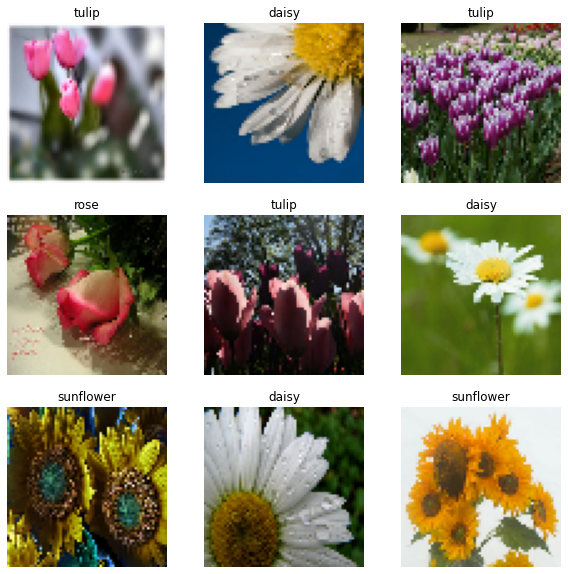

In [ ]:
class_names = ["bougenvile", "daisy", "rose", "sunflower", "tulip"]
plt.figure(figsize=(10,10))
for images, labels in train_dataset.take(1):
    for i in range(9):
        ax = plt.subplot(3,3,i+1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

In [ ]:
# Create model
def create_model():
  model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(128, (3,3), activation='relu', input_shape = (64,64,3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (5,5), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(16, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(5, activation='sigmoid')
  ])

  model.compile(
    optimizer="adam",
    loss='SparseCategoricalCrossentropy',
    metrics=['accuracy'])
  
  return model

In [ ]:
# Get the untrained model
model = create_model()

# Train the model
history = model.fit(train_generator,
                    epochs=13,
                    verbose=1,
                    validation_data=validation_generator)

Epoch 1/13
111/111 [==============================] - 72s 642ms/step - loss: 1.1810 - accuracy: 0.4914 - val_loss: 1.1276 - val_accuracy: 0.5565
Epoch 2/13
111/111 [==============================] - 69s 624ms/step - loss: 0.9692 - accuracy: 0.5901 - val_loss: 1.0666 - val_accuracy: 0.5968
Epoch 3/13
111/111 [==============================] - 69s 620ms/step - loss: 0.8791 - accuracy: 0.6273 - val_loss: 0.8596 - val_accuracy: 0.5968
Epoch 4/13
111/111 [==============================] - 70s 632ms/step - loss: 0.8039 - accuracy: 0.6472 - val_loss: 0.8791 - val_accuracy: 0.6331
Epoch 5/13
111/111 [==============================] - 68s 614ms/step - loss: 0.7706 - accuracy: 0.6626 - val_loss: 0.8205 - val_accuracy: 0.6613
Epoch 6/13
111/111 [==============================] - 69s 621ms/step - loss: 0.7182 - accuracy: 0.6866 - val_loss: 0.7927 - val_accuracy: 0.6653
Epoch 7/13
111/111 [==============================] - 69s 620ms/step - loss: 0.6541 - accuracy: 0.7174 - val_loss: 0.7202 - val_ac

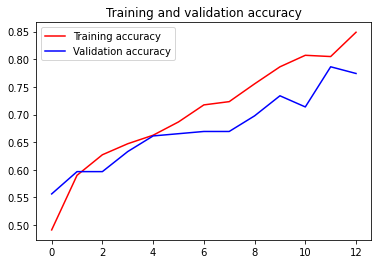

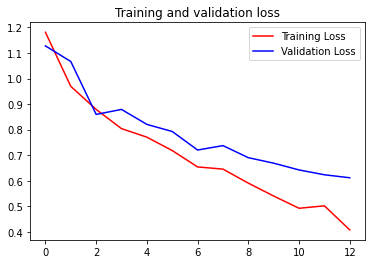

In [ ]:
# Plot the chart for accuracy and loss on both training and validation
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
model.evaluate(test_dataset)

13/13 [==============================] - 2s 134ms/step - loss: 94.2398 - accuracy: 0.7379


[94.23978424072266, 0.7379032373428345]

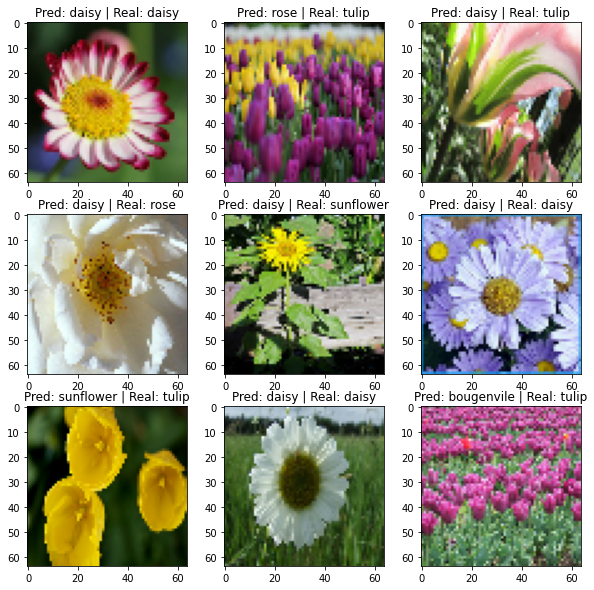

In [ ]:
#Show images in grid

plt.figure(figsize=(10,10))
for images, labels in test_dataset.take(1):
    classifications = model(images)
    
    for i in range(9):
        ax = plt.subplot(3,3,i+1)
        plt.imshow(images[i].numpy().astype("uint8"))
        index = np.argmax(classifications[i])
        plt.title("Pred: " + class_names[index] + " | Real: " + class_names[labels[i]])

In [ ]:
#Export Image with TFLite

converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

with open("model.tflite", "wb") as file:
    file.write(tflite_model)

INFO:tensorflow:Assets written to: /tmp/tmp9sruuip9/assets
